In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

fruits=pd.read_csv('fruit-data-with-colours-master/fruit_data_with_colours.csv')

In [2]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
look_up_fruit=dict(zip(fruits.fruit_label.unique(),fruits.fruit_name.unique()))
look_up_fruit

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

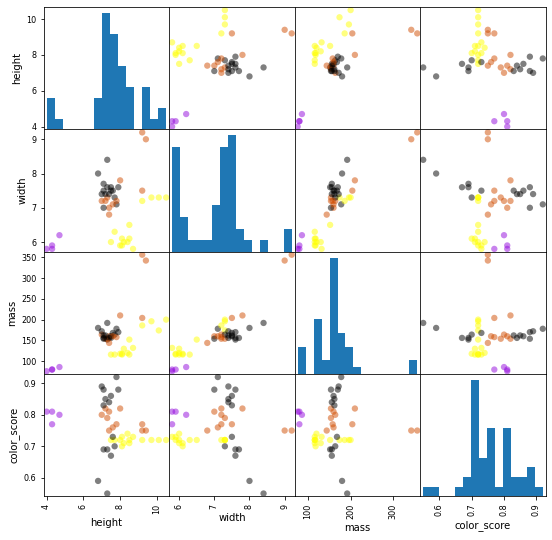

In [4]:
# plotting a scatter matrix
from matplotlib import cm
from pandas.plotting import scatter_matrix

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

In [5]:
from matplotlib import cm
X=fruits[['mass','height','width','color_score']]
y=fruits['fruit_label']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)


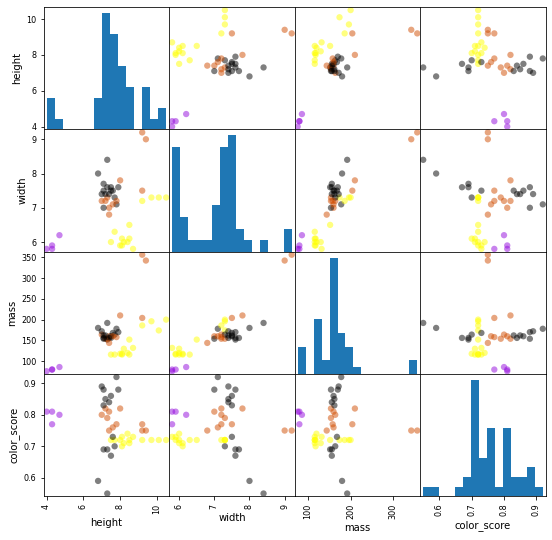

In [6]:
from pandas.plotting import scatter_matrix
from matplotlib import cm
X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

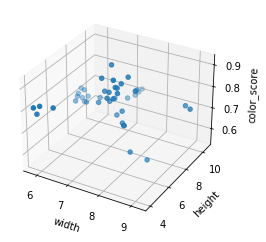

In [7]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X_train['width'],X_train['height'],X_train['color_score'])
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

In [8]:
X=fruits[['mass','width','height']]
y=fruits['fruit_label']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

In [10]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [11]:
knn.score(X_train,y_train)

0.7954545454545454

In [12]:
fruit_prediction=knn.predict([[20,3.4,3.2]])
look_up_fruit[fruit_prediction[0]]

'mandarin'

In [13]:
fruit_prediction=knn.predict([[100,34,23]])
look_up_fruit[fruit_prediction[0]]

'lemon'

C:\Users\mayan\Downloads\python\adspy_shared_utilities.py:195: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


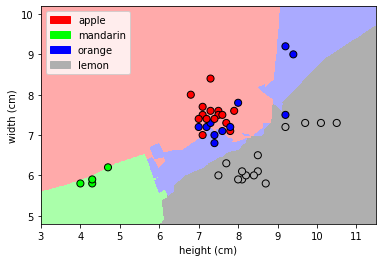

In [16]:
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 10, 'uniform')


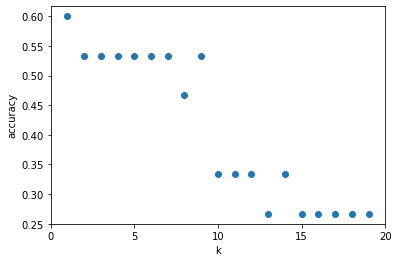

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

k_range=range(1,20)
scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))
    
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range,scores)
plt.xticks([0,5,10,15,20]);

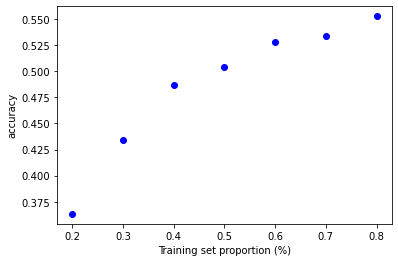

In [23]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');